In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from pathlib import Path

In [27]:
# Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
file_path = "crypto_data.csv"

In [28]:
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


# Data Preparation

In [74]:
# Discard all cryptocurrencies that are not being traded. 
# In other words, filter for currencies that are currently being traded. 
# Once you have done this, drop the IsTrading column from the dataframe.


df_isTrading = df.loc[df["IsTrading"] != False,:]
df_isTrading_droppedColumn = df_isTrading.drop("IsTrading", axis=1)
df_isTrading_droppedColumn.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [30]:
# Remove all rows that have at least one null value.

df_new = df_isTrading_droppedColumn.dropna(how='any')

In [75]:
df_new.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [32]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

df_mined = df_new.loc[df_new["TotalCoinsMined"] > 0,:]

In [76]:
df_mined.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [34]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.

df_droppedName = df_mined.drop("CoinName", axis=1)

In [77]:
df_droppedName.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [37]:
# Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
# To accomplish this task, use Pandas to create dummy variables.
# Examine the number of rows and columns of your dataset now. How did they change?


dummies_df = pd.get_dummies(df_droppedName[['Algorithm','ProofType']])

In [78]:
dummies_df.head()

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,x,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.654442,27.058075
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.615578,29.563417
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.661333,11.488992
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-16.369774,9.841852
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-16.918253,-9.467807


In [79]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

scaler = StandardScaler().fit(dummies_df)
dummies_df.head()

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,x,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.654442,27.058075
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.615578,29.563417
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.661333,11.488992
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-16.369774,9.841852
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-16.918253,-9.467807


# Dimensionality Reduction

### PCA

In [52]:
# Initialize PCA model
pca = PCA(n_components = .90)

# Get two principal components for the iris data.
df_pca = pca.fit_transform(dummies_df)

In [53]:
# Fetch the explained variance
print(len(pca.explained_variance_ratio_))

28


In [54]:
df_dummy_pca = pd.DataFrame(
    data=df_pca
)
df_dummy_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.818590,-0.679238,-0.029653,-0.026490,0.003767,-0.021776,0.037377,-0.035327,-0.007972,0.015611,...,2.570721e-16,8.259636e-17,1.504842e-16,1.746648e-16,0.003087,-0.022310,0.009592,-0.005577,-0.001453,9.101086e-16
1,0.818590,-0.679238,-0.029653,-0.026490,0.003767,-0.021776,0.037377,-0.035327,-0.007972,0.015611,...,2.262336e-16,7.006978e-17,1.369199e-16,1.874046e-16,0.003087,-0.022310,0.009592,-0.005577,-0.001453,9.707301e-16
2,0.758204,0.226288,-0.356893,-0.303659,-0.402237,-0.203239,-0.422634,0.664480,-0.248949,-0.053923,...,2.592902e-16,-5.460571e-17,-6.514279e-16,5.320575e-16,0.005482,-0.002013,0.000526,0.006314,0.001495,2.932615e-16
3,-0.707081,0.247106,-0.272641,-0.608229,0.634287,-0.011788,-0.020367,0.019910,-0.026809,-0.026504,...,1.249486e-18,-3.611616e-16,-6.650912e-17,3.921965e-17,0.002130,0.017677,-0.000220,0.006706,0.002478,-7.362564e-16
4,-0.701105,0.138632,-0.207310,-0.102274,-0.230515,-0.000868,-0.160545,-0.103472,0.047507,-0.127817,...,-3.180841e-17,1.173246e-16,-9.798761e-17,1.579191e-16,0.002725,-0.010138,-0.011417,0.015868,0.000689,2.787919e-16


### TSNE

In [56]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(df_pca)

In [58]:
dummies_df['x'] = transformed_features[:,0]
dummies_df['y'] = transformed_features[:,1]

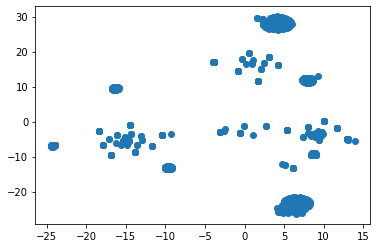

In [60]:
plt.scatter(dummies_df['x'], dummies_df['y'])
plt.show()

# Cluster Analysis with k-Means

C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


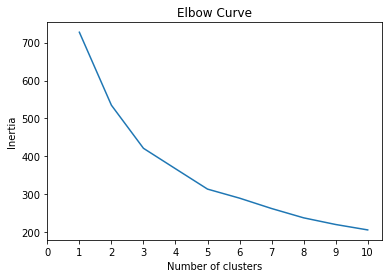

In [73]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendation

Based off this elbow curve it is inconclusive in my opinion of what a distinct number of clusters (k) should be. If I was to take an educated assumption from this chart I would say that it starts to even out around k = 7. Based off the TSNE scatter plot there is a few disctinct clusters to visualize but nothing entirely convincing.